### №1 Section for importing libraries and reading data

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

colors = ['b', 'g', 'r']
markers = ['s', '*', 'o']
work_dir_path = os.path.join(os.getcwd(), 'bin_data')
spectra_path = os.path.join(work_dir_path, 'data.npy')
labels_path = os.path.join(work_dir_path, 'labels.npy')
spectra = np.load(spectra_path)
labels = np.load(labels_path)

### №2 Section for visualizing input data

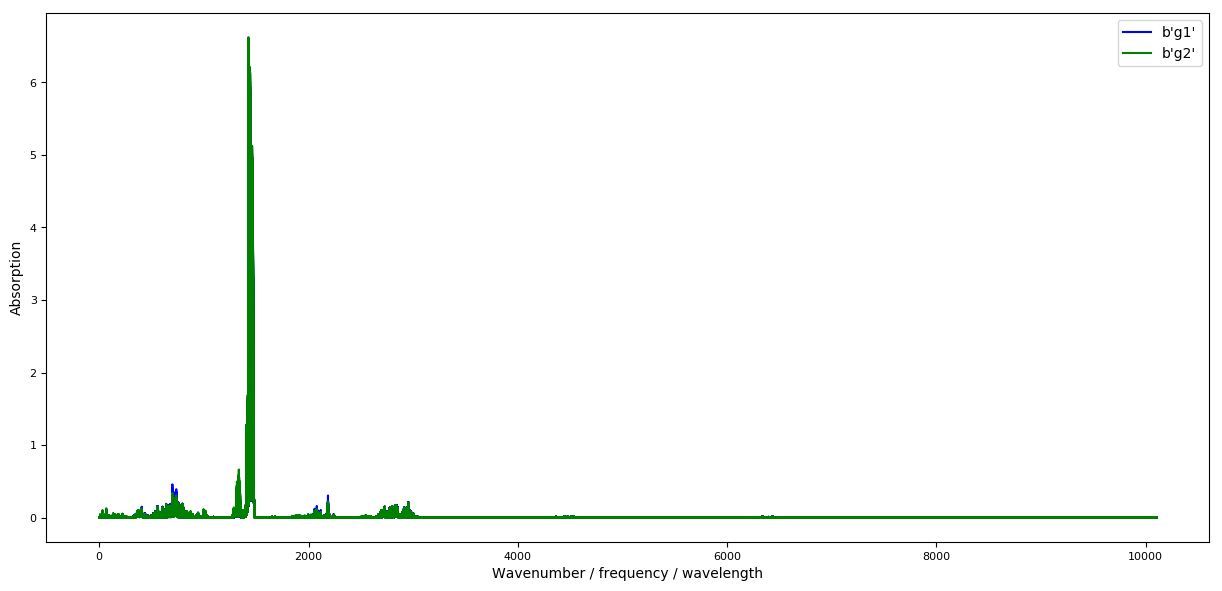

In [22]:
def plot_spectra(spectra, labels):
    unique_labels = np.unique(labels)

    fig = plt.figure(figsize=(15, 7), dpi=100)
    plt.ylabel('Absorption', fontsize=10)
    plt.xlabel('Wavenumber / frequency / wavelength', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    c = 1
    for label in unique_labels:
        label_indices = (labels[:] == label)
        label_spectra = spectra[label_indices]
        
        for spectrum in label_spectra:
            plt.plot(range(0, len(spectrum)), spectrum, color=colors[len(colors) % c], label=label)
        c += 1

    legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
    handle_by_label = dict(zip(legend_labels, legend_handles))
    plt.legend(handle_by_label.values(), handle_by_label.keys()) 
    plt.show()

    return

plot_spectra(spectra, labels)

### №3 Section for calculating PCA and displaying explained variance

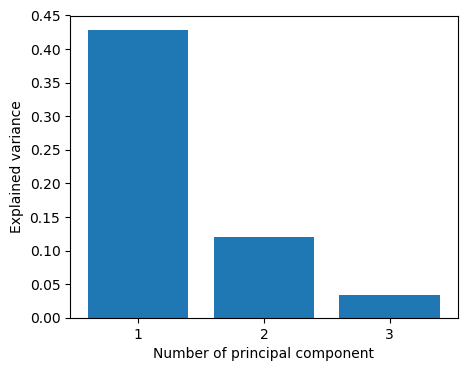

In [23]:
    n_components = 3

    pca = PCA(n_components=n_components)
    pca.fit(spectra)
    pca_result = pca.fit_transform(spectra)

    fig = plt.figure(num='Explained variance')
    ax = fig.add_subplot(111)
    ax.bar(range(1,n_components + 1) ,pca.explained_variance_)
    ax.grid(False)
    plt.xticks(range(1, n_components + 1))
    plt.xlabel('Number of principal component')
    plt.show()

### Below is the section for displaying results of PCA in scatter plot form

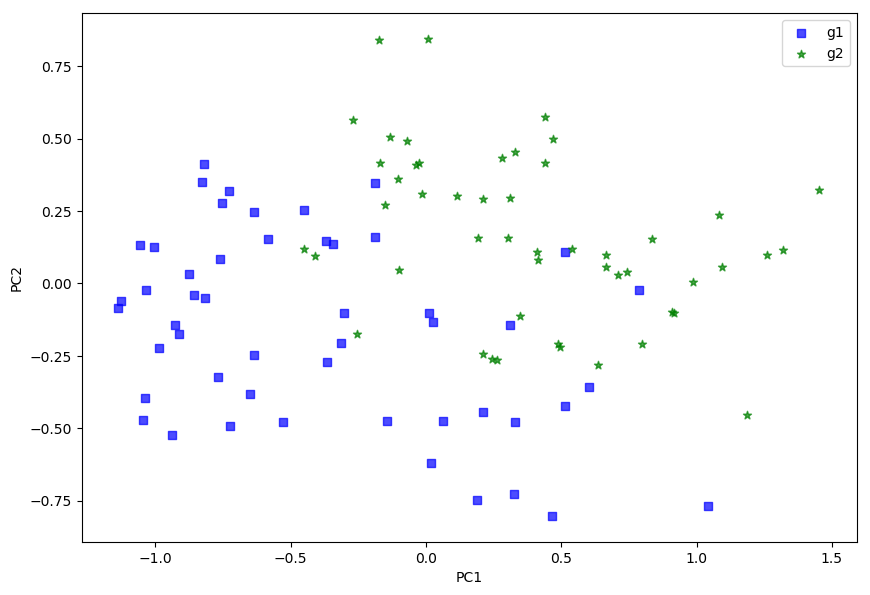

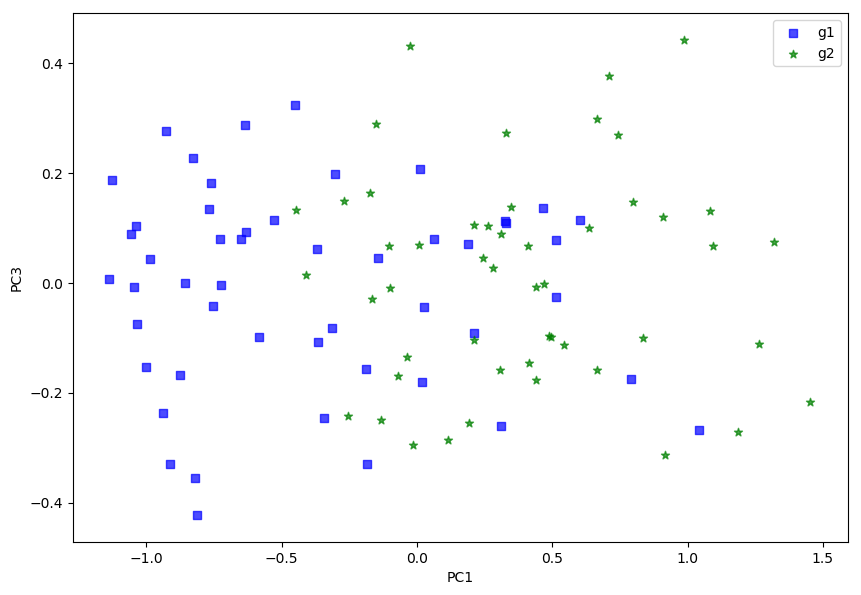

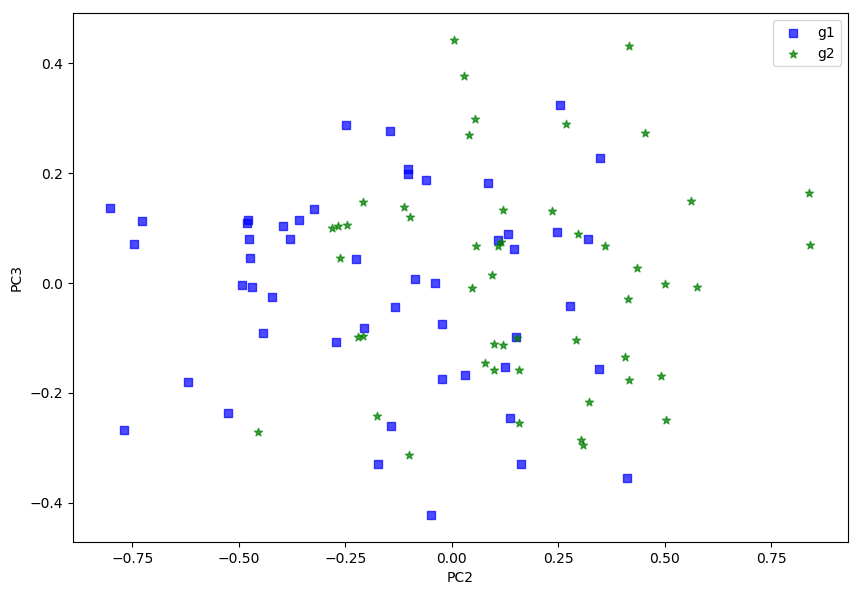

In [4]:
    pcax = pca_result[0:50,:]
    pcay = pca_result[50:100,:]

    for i in range(0, n_components):
        for j in range(i+1, n_components):
            fig = plt.figure(figsize=(10,7), dpi=100)
            ax = fig.add_subplot(111)
            ax.scatter(pcax[:, i], pcax[:, j], alpha=0.7, c='b', marker='s', label='g1')
            ax.scatter(pcay[:, i], pcay[:, j], alpha=0.7, c='g', marker='*', label='g2')
            ax.legend()
            ax.grid(False)
            ax.set_xlabel('PC' + str(i+1))
            ax.set_ylabel('PC' + str(j+1))
            plt.show()